In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import datetime

In [56]:
start_date="2021-12-01"
end_date="2022-3-01" 

In [57]:
df_Lomb=pd.read_csv(
    "..\\Lombardia\\lomb_tot.csv",
    na_values="n.d."
)

df_Lomb ["Data"]=pd.to_datetime(df_Lomb ["Data"])
df_Lomb.sort_values(by="Data", inplace=True)
df_Lomb .set_index('Data', inplace=True)
df_Lomb= df_Lomb.loc[start_date:end_date,:]
df_Lomb.drop(["Unnamed: 0"],axis=1,inplace=True)
df_Lomb=df_Lomb.reset_index().drop_duplicates(subset="Data")
df_Lomb



,Data,Ozone,Humidity,Sol_rad,Wind_speed,Wind_dir,Temp
0,2021-12-01 00:00:00,64.7,48.6,0.0,2.5,241.0,7.9
1,2021-12-01 01:00:00,67.1,51.6,0.0,3.5,342.0,8.0
2,2021-12-01 02:00:00,64.2,52.4,0.0,3.2,332.0,8.2
3,2021-12-01 03:00:00,54.6,53.0,0.0,2.4,332.0,7.8
4,2021-12-01 04:00:00,43.2,62.0,0.0,3.9,61.0,7.6
...,...,...,...,...,...,...,...
2179,2022-03-01 19:00:00,38.9,44.7,0.0,2.1,241.0,8.4
2180,2022-03-01 20:00:00,29.1,50.9,0.0,1.3,277.0,6.0
2181,2022-03-01 21:00:00,18.7,53.2,0.0,1.6,295.0,4.8
2182,2022-03-01 22:00:00,11.0,55.8,0.0,1.9,285.0,4.5


In [58]:
df_Lomb["Ora"] = df_Lomb.set_index("Data").index.hour
df_Lomb=df_Lomb[(df_Lomb["Ora"]<=7) | (df_Lomb["Ora"]>=19)]
df_Lomb

,Data,Ozone,Humidity,Sol_rad,Wind_speed,Wind_dir,Temp,Ora
0,2021-12-01 00:00:00,64.7,48.6,0.0,2.5,241.0,7.9,0
1,2021-12-01 01:00:00,67.1,51.6,0.0,3.5,342.0,8.0,1
2,2021-12-01 02:00:00,64.2,52.4,0.0,3.2,332.0,8.2,2
3,2021-12-01 03:00:00,54.6,53.0,0.0,2.4,332.0,7.8,3
4,2021-12-01 04:00:00,43.2,62.0,0.0,3.9,61.0,7.6,4
...,...,...,...,...,...,...,...,...
2179,2022-03-01 19:00:00,38.9,44.7,0.0,2.1,241.0,8.4,19
2180,2022-03-01 20:00:00,29.1,50.9,0.0,1.3,277.0,6.0,20
2181,2022-03-01 21:00:00,18.7,53.2,0.0,1.6,295.0,4.8,21
2182,2022-03-01 22:00:00,11.0,55.8,0.0,1.9,285.0,4.5,22


Text(0.5, 1.0, '(Lombardia) Wind Direction From 2021-12-01 to 2022-3-01')

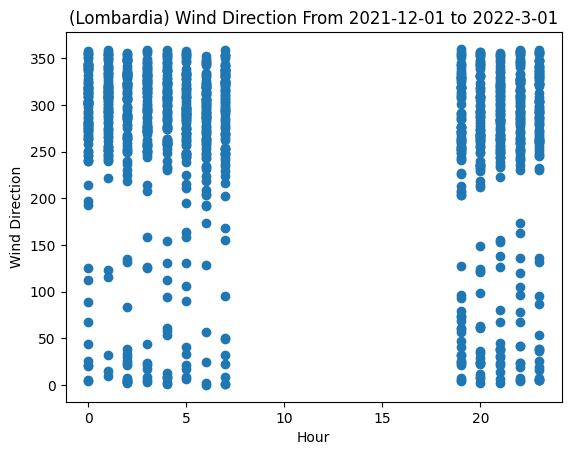

In [59]:
plt.scatter(df_Lomb["Ora"],df_Lomb["Wind_dir"])
plt.xlabel("Hour")
plt.ylabel("Wind Direction")
plt.title("(Lombardia) Wind Direction From "+start_date+" to "+end_date)

In [61]:
df_Riva=pd.read_csv(
    "..\\Riva\\Riva_windDir.csv",
    na_values="n.d."
)

#df_Riva=df_Riva.strftime("%H:%M:%S %m/%d/%Y")

df_Riva["Data"]=pd.to_datetime(df_Riva["Data"], format="%H:%M:%S %d/%m/%Y")
df_Riva.sort_values(by="Data", inplace=True)
df_Riva.set_index('Data', inplace=True)
df_Riva= df_Riva.loc[start_date:end_date,:]
df_Riva=df_Riva.reset_index().drop_duplicates(subset="Data")
df_Riva = df_Riva.set_index("Data").resample("H").mean().reset_index()
df_Riva


,Data,Dir_Vento,Qual
0,2021-12-01 00:00:00,58.166667,145.0
1,2021-12-01 01:00:00,58.666667,145.0
2,2021-12-01 02:00:00,59.666667,145.0
3,2021-12-01 03:00:00,58.333333,145.0
4,2021-12-01 04:00:00,56.000000,145.0
...,...,...,...
2179,2022-03-01 19:00:00,58.666667,145.0
2180,2022-03-01 20:00:00,88.833333,145.0
2181,2022-03-01 21:00:00,53.000000,145.0
2182,2022-03-01 22:00:00,42.166667,145.0


In [62]:
df_Riva["Ora"] = df_Riva.set_index("Data").index.hour
#df_Lomb=df_Lomb[(df_Lomb["Ora"]<=7) | (df_Lomb["Ora"]>=19)]
df_Riva

,Data,Dir_Vento,Qual,Ora
0,2021-12-01 00:00:00,58.166667,145.0,0
1,2021-12-01 01:00:00,58.666667,145.0,1
2,2021-12-01 02:00:00,59.666667,145.0,2
3,2021-12-01 03:00:00,58.333333,145.0,3
4,2021-12-01 04:00:00,56.000000,145.0,4
...,...,...,...,...
2179,2022-03-01 19:00:00,58.666667,145.0,19
2180,2022-03-01 20:00:00,88.833333,145.0,20
2181,2022-03-01 21:00:00,53.000000,145.0,21
2182,2022-03-01 22:00:00,42.166667,145.0,22


Text(0.5, 1.0, '(Riva) Wind Direction From 2021-12-01 to 2022-3-01')

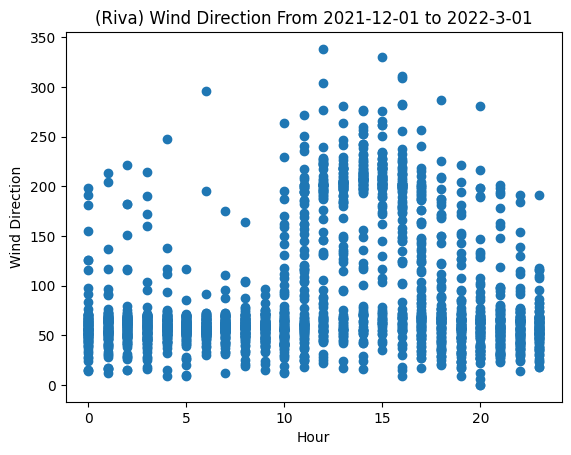

In [63]:
plt.scatter(df_Riva["Ora"],df_Riva["Dir_Vento"])
plt.xlabel("Hour")
plt.ylabel("Wind Direction")
plt.title("(Riva) Wind Direction From "+start_date+" to "+end_date)

In [ ]:
#Veneto_garda

In [64]:
df_Veneto=pd.read_csv(
    "VenetoGrada.csv",
    na_values="n.d."
)


df_Veneto=df_Veneto.drop(["STATIONID","PREVIOUS","MIN_HUMID","MAX_HUMID","RADSOL"],axis=1)

list = []
df_Veneto.YEAR = df_Veneto.YEAR.apply(lambda x: x.replace(" ",""))
for i in df_Veneto.index:
    list.append(pd.to_datetime(str(df_Veneto.MONTH[i]).zfill(2) +"/"+str(df_Veneto.DAY[i]).zfill(2) +"/"+str(df_Veneto.YEAR[i])))
df_Veneto["Data"] = list


In [65]:
for i in df_Veneto.index:
    df_Veneto["Data"][i] = df_Veneto["Data"][i] + pd.Timedelta(hours = df_Veneto["HOUR"][i])

df_Veneto.drop(["DAY","MONTH","YEAR","HOUR"], axis=1,inplace=True)
df_Veneto["Ora"] = df_Veneto.set_index("Data").index.hour

df_Veneto

C:\Users\rajaf\AppData\Local\Temp\ipykernel_9744\528730342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Veneto["Data"][i] = df_Veneto["Data"][i] + pd.Timedelta(hours = df_Veneto["HOUR"][i])
C:\Users\rajaf\AppData\Local\Temp\ipykernel_9744\528730342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Veneto["Data"][i] = df_Veneto["Data"][i] + pd.Timedelta(hours = df_Veneto["HOUR"][i])
C:\Users\rajaf\AppData\Local\Temp\ipykernel_9744\528730342.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/panda

,AVERAGE_TEMP,VAVERAGEWIND,DWINDOPREV,DWINDOPREV_SECTOR,PRESSMARE,BFOGL,Data,Ora
0,4.1,3.4,22.5,NNE,1014.3,0,2021-12-01 01:00:00,1
1,3.5,2.7,45.0,NE,1014.2,0,2021-12-01 02:00:00,2
2,2.8,2.5,45.0,NE,1014.0,0,2021-12-01 03:00:00,3
3,2.2,2.1,45.0,NE,1013.9,0,2021-12-01 04:00:00,4
4,2.4,2.9,22.5,NNE,1013.7,0,2021-12-01 05:00:00,5
...,...,...,...,...,...,...,...,...
2179,4.0,0.3,22.5,NNE,1028.1,0,2022-03-01 20:00:00,20
2180,3.2,0.0,22.5,NNE,1028.2,0,2022-03-01 21:00:00,21
2181,2.0,0.7,22.5,NNE,1028.4,0,2022-03-01 22:00:00,22
2182,2.1,0.6,0.0,N,1028.4,0,2022-03-01 23:00:00,23


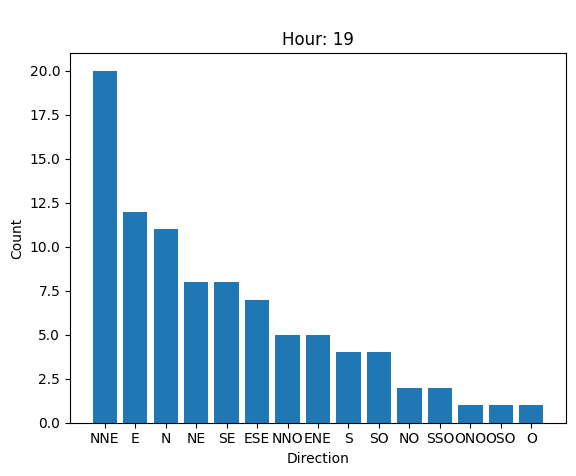

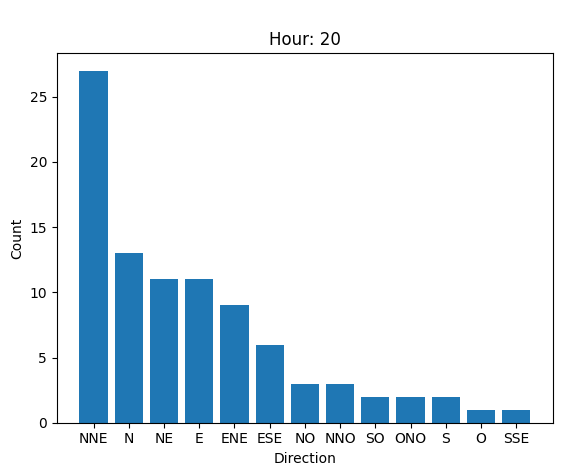

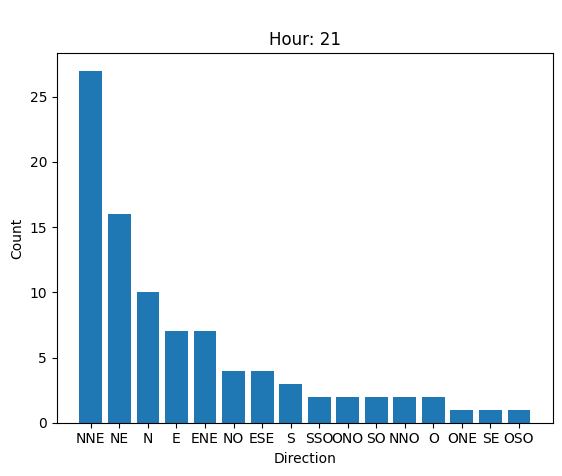

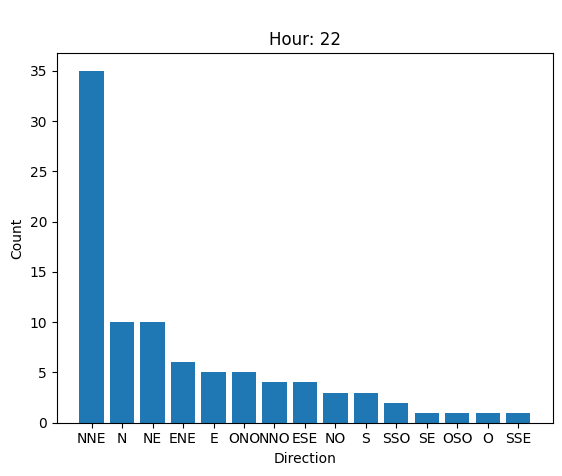

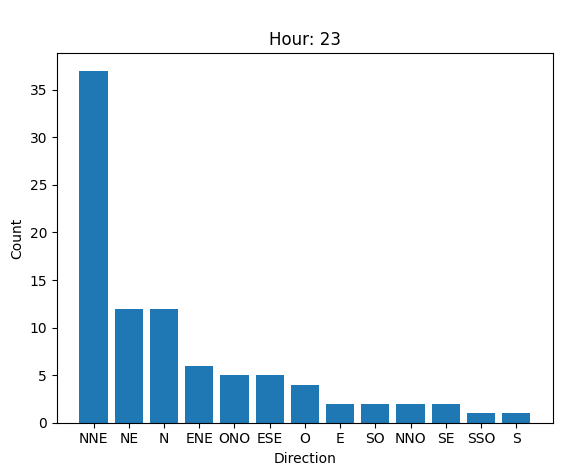

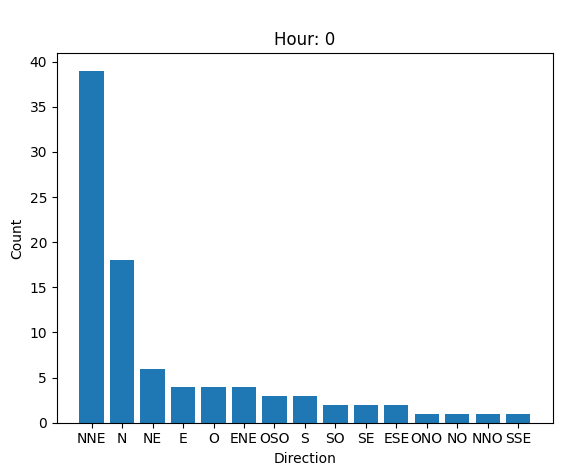

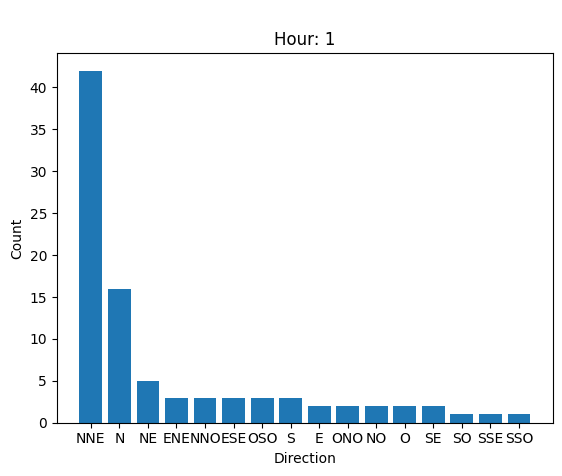

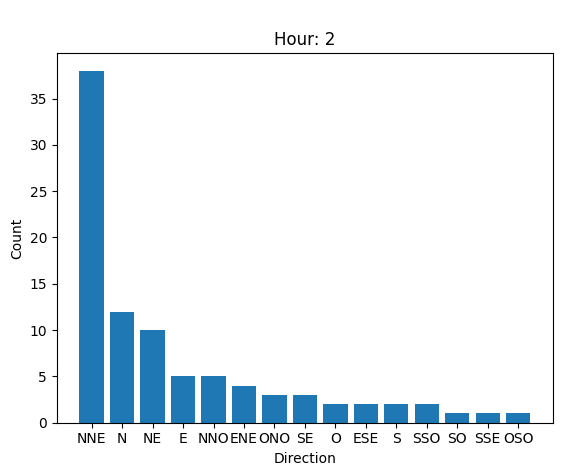

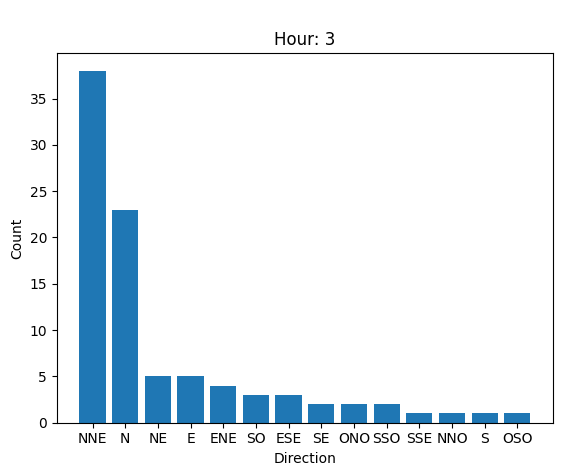

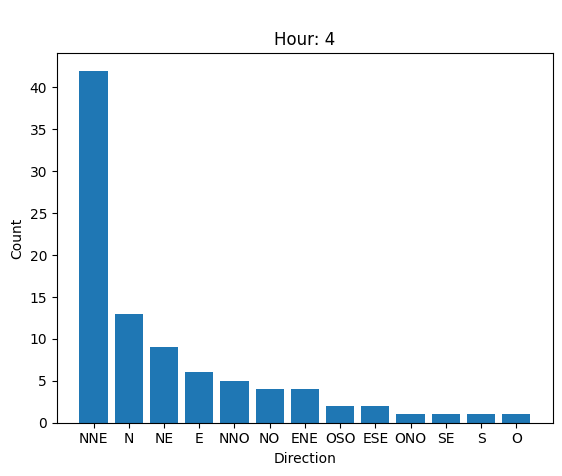

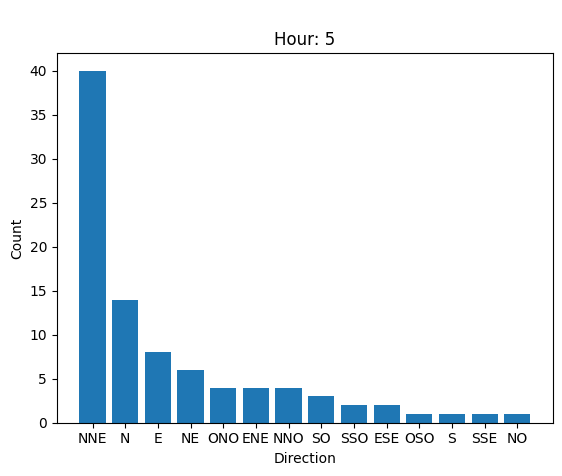

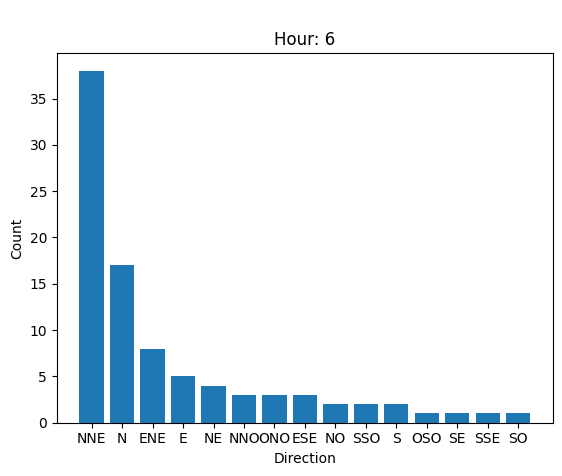

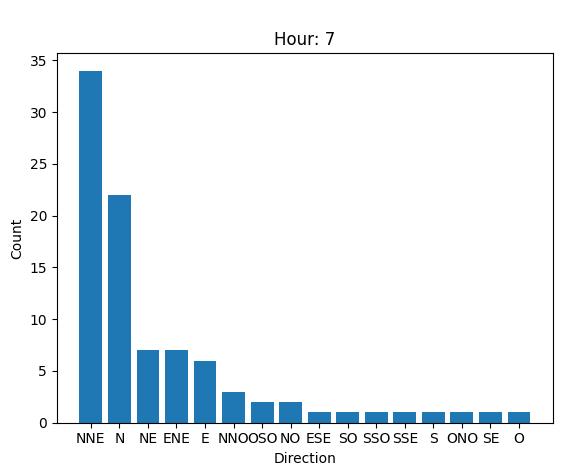

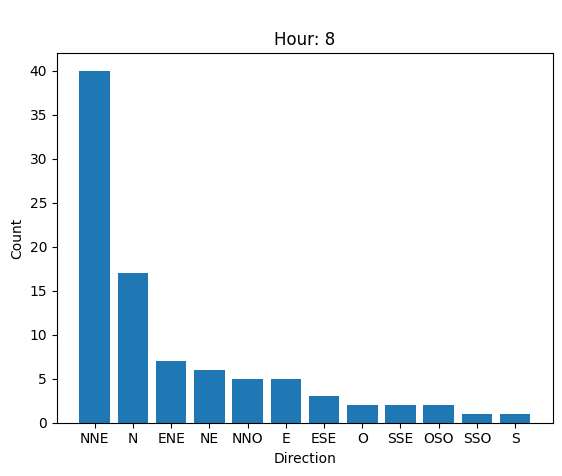

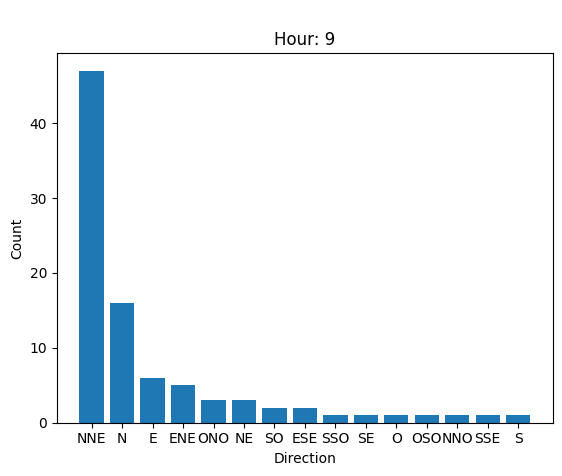

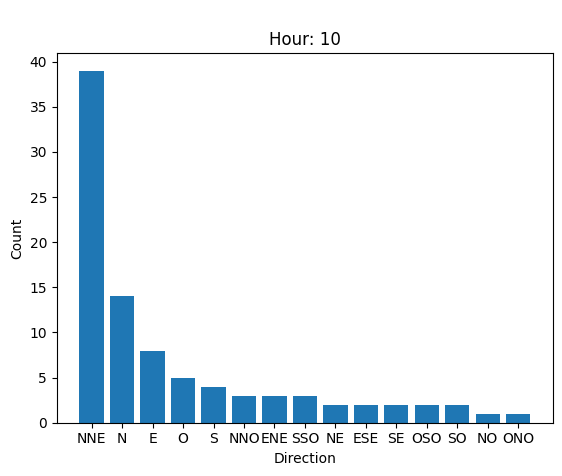

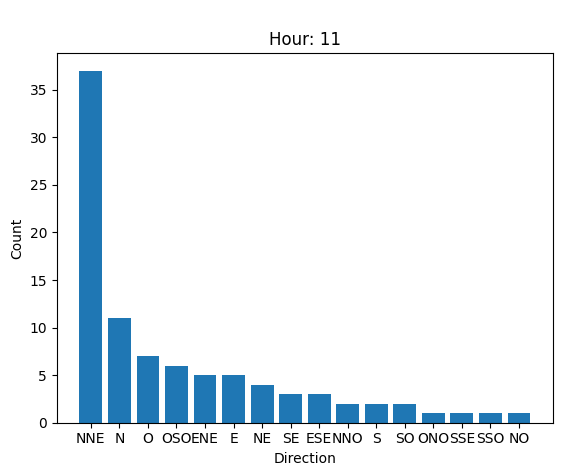

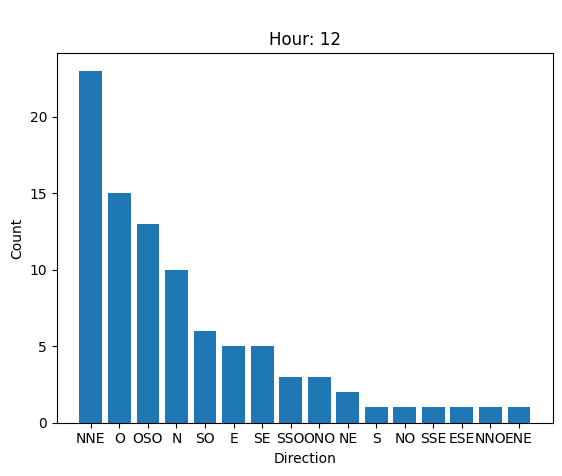

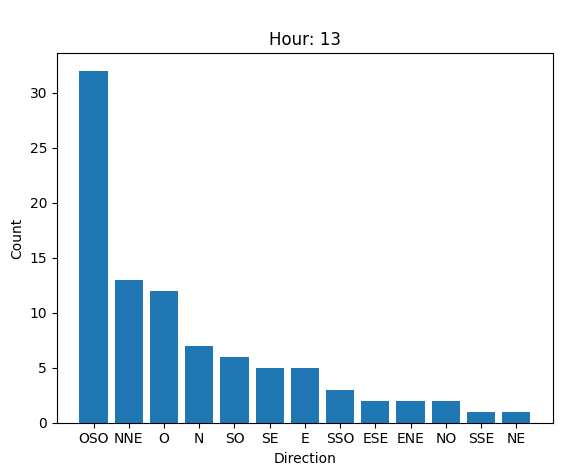

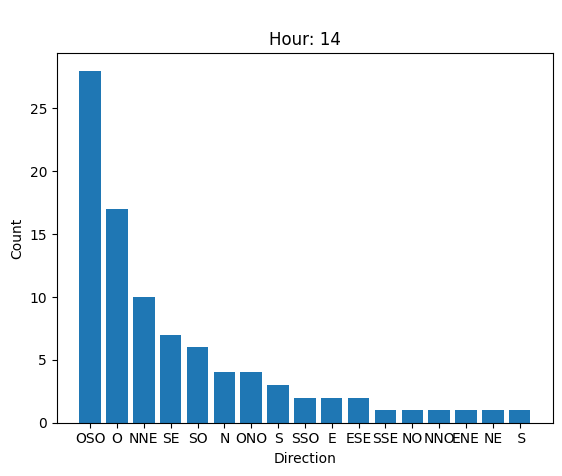

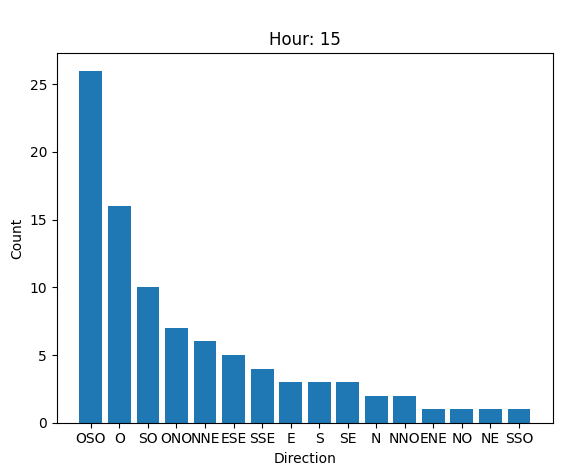

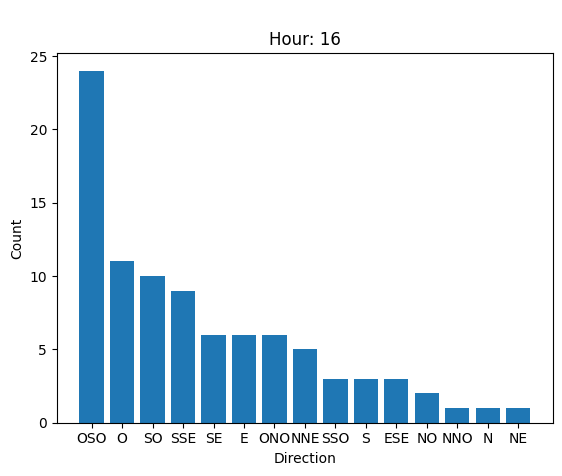

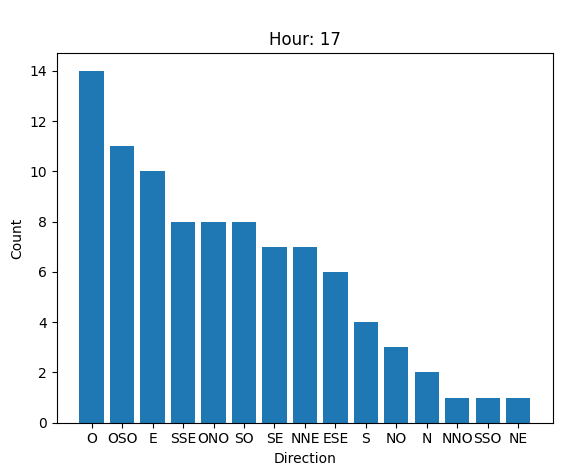

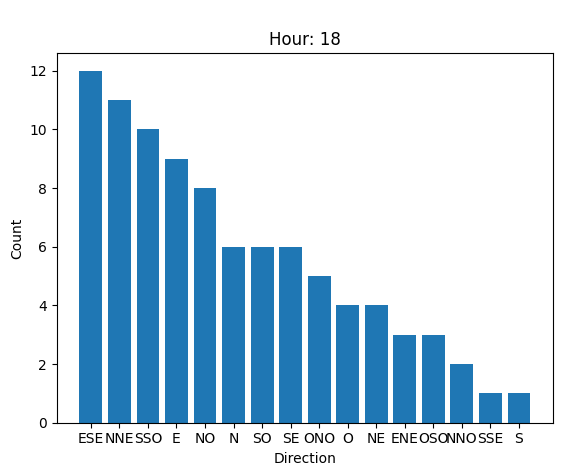

In [66]:

#df_Lomb=df_Lomb[(df_Lomb["Ora"]<=7) | (df_Lomb["Ora"]>=19)]
#df_Veneto["DWINDOPREV_SECTOR"].value_counts()

lista=[19,20,21,22,23,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
for i in lista:
    df_new=df_Veneto.loc[df_Veneto["Ora"]==i]
    
    list=df_new["DWINDOPREV_SECTOR"].value_counts()

    plt.figure()
    list=list.reset_index()
    plt.title("\nHour: "+str(i))
    plt.bar(list["DWINDOPREV_SECTOR"],list["count"])
    plt.xlabel("Direction")
    plt.ylabel("Count")
    plt.show()


    
    
    



Text(0.5, 1.0, '(VenetoGarda) Wind Direction From 2021-12-01 to 2022-3-01')

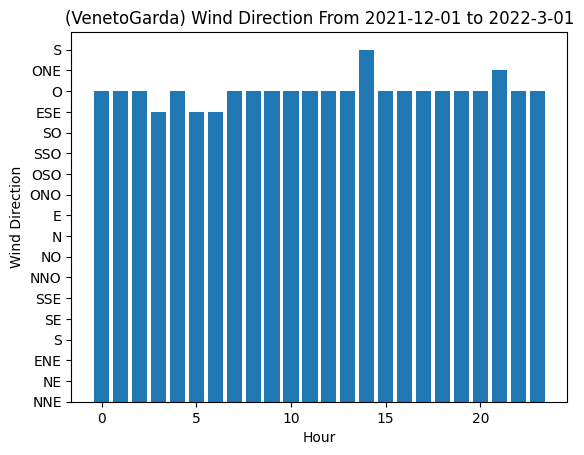

In [ ]:
plt.bar(df_Veneto["Ora"],df_Veneto["DWINDOPREV_SECTOR"])
plt.xlabel("Hour")
plt.ylabel("Wind Direction")
plt.title("(VenetoGarda) Wind Direction From "+start_date+" to "+end_date)